In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# new import statements
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score
from sklearn.cluster import KMeans

# Classification 2 - wrap up

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], \
                  columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")
train, test = train_test_split(df, test_size=10, random_state=5)
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica
57,4.9,2.4,1,1.0,False,versicolor
1,4.9,3.0,1,0.2,True,setosa
70,5.9,3.2,1,1.8,False,versicolor
25,5.0,3.0,1,0.2,True,setosa
84,5.4,3.0,1,1.5,False,versicolor


### Review: models
- Model 1: Predict petal width 
    - regression problem
- Model 2 - part a: Predict whether flower is "setosa"
    - classification problem, specifically binary classification: True / False
- Model 2 - part b: Predict probablity of flower being "setosa"
    - classification problem, probablity between 0 to 1

In [3]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "setosa"

# 1. initialize model
cls_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
cls_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["setosa_predictions"] = cls_model.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,setosa_predictions
82,5.8,2.7,1,1.2,False,versicolor,False
134,6.1,2.6,1,1.4,False,virginica,False
114,5.8,2.8,1,2.4,False,virginica,False
42,4.4,3.2,1,0.2,True,setosa,True
109,7.2,3.6,1,2.5,False,virginica,False
57,4.9,2.4,1,1.0,False,versicolor,False
1,4.9,3.0,1,0.2,True,setosa,True
70,5.9,3.2,1,1.8,False,versicolor,False
25,5.0,3.0,1,0.2,True,setosa,True
84,5.4,3.0,1,1.5,False,versicolor,False


### Model 3: Predict variety of flower

- classification problem, specifically multi-class classification for `variety`

In [4]:
# PREDICT: which of the 3 varieties is a particular Iris?
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

# 1. initialize model
mult_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
mult_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["variety_predictions"] = mult_model.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,setosa_predictions,variety_predictions
82,5.8,2.7,1,1.2,False,versicolor,False,versicolor
134,6.1,2.6,1,1.4,False,virginica,False,virginica
114,5.8,2.8,1,2.4,False,virginica,False,versicolor
42,4.4,3.2,1,0.2,True,setosa,True,setosa
109,7.2,3.6,1,2.5,False,virginica,False,virginica
57,4.9,2.4,1,1.0,False,versicolor,False,versicolor
1,4.9,3.0,1,0.2,True,setosa,True,setosa
70,5.9,3.2,1,1.8,False,versicolor,False,versicolor
25,5.0,3.0,1,0.2,True,setosa,True,setosa
84,5.4,3.0,1,1.5,False,versicolor,False,versicolor


#### `predictions = F(sepl, sepw)`

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

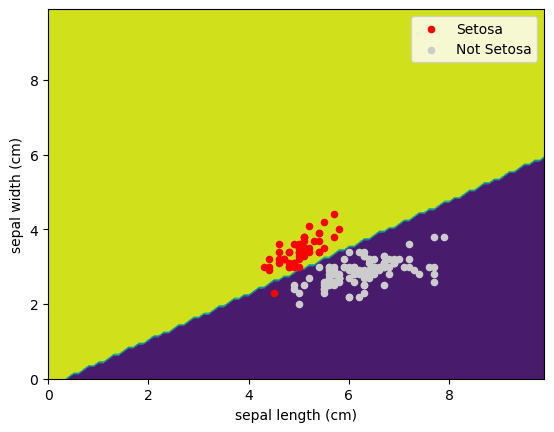

In [5]:
# Creating range of values for sepl (X) and sepw (Y)
sepl, sepw = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))

predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})

# Predicting setosa (True / False) labels using LogisticRegression model
Z_predictions = cls_model.predict(predict_df)

# Creating contourf plot
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))
ax = plt.gca()   # get current axes subplot
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                              ax=ax, color="r", label="Setosa")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                               ax=ax, color="0.8", label="Not Setosa")

#### Visualizing Multiple-classification Boundaries (self-study example)

In [6]:
classes_ = list(mult_model.classes_)
classes_

['setosa', 'versicolor', 'virginica']

In [7]:
classes_.index("versicolor")

1

In [8]:
# we need numeric values for Z
# hence .index usage instead of actual values of variety predictions
predictions = np.array([classes_.index(name) for name in mult_model.predict(predict_df)])
predictions

array([1, 1, 1, ..., 0, 0, 0])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

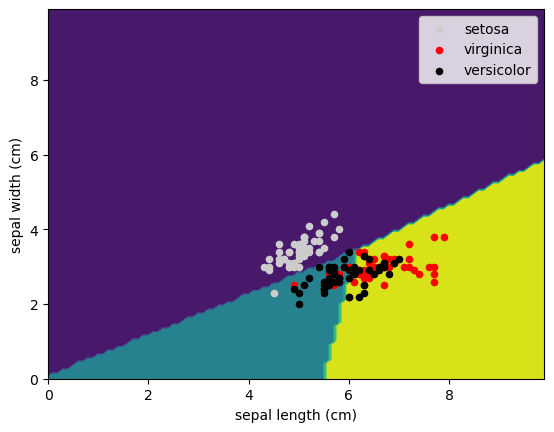

In [9]:
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                           ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                              ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                               ax=ax, label="versicolor", color="k")

#### Can we do better by creating a `Pipeline` of `PolynomialFeatures` and `LogisticRegression` models?

In [10]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "setosa"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=10, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False)),
])
model.fit(train[xcols], train[ycol])

Pipeline(steps=[('pf', PolynomialFeatures(degree=10, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False))])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

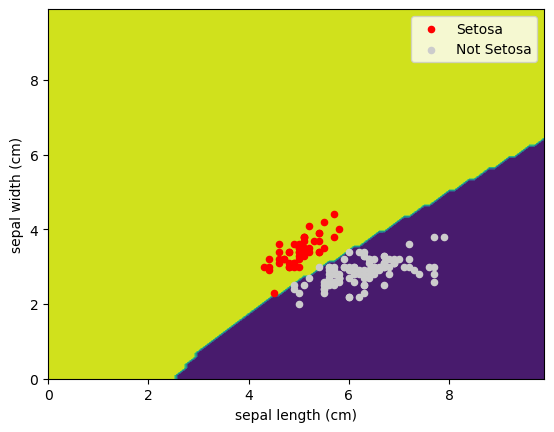

In [11]:
# Creating range of values for sepl (X) and sepw (Y)
sepl, sepw = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})

# Predicting setosa (True / False) labels using LogisticRegression model
Z_predictions = model.predict(predict_df)

# Creating contourf plot
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))
ax = plt.gca()
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                              ax=ax, color="r", label="Setosa")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                               ax=ax, 
                               color="0.8", label="Not Setosa")

#### Multi-classification model to predict `variety` using  `Pipeline` of `PolynomialFeatures` and `LogisticRegression` models

In [12]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False)),
])
model.fit(train[xcols], train[ycol])

/Users/msyamkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False))])

#### LogisticRegression uses an "iterative algorithm"

- chooses some random coefficients
- LOOP (some fixed number of iterations/"epochs")
    - tweaks the coefficients to get slightly better accuracy
    - if accuarcy isn't improving much:
        - exit the loop early

#### Solution 1: increase number of iterations

In [13]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=1000)),
])
model.fit(train[xcols], train[ycol])

Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False, max_iter=1000))])

[0 0 0 ... 0 0 0]


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

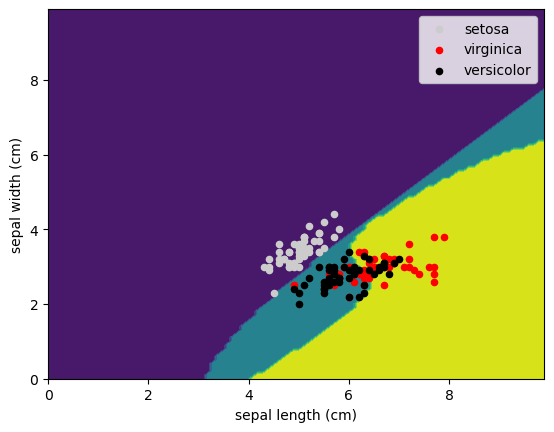

In [14]:
# Predicting variety labels using LogisticRegression model
predictions = np.array([classes_.index(name) for name in model.predict(predict_df)])
print(predictions)

# Creating contourf plot
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                           ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                              ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                               ax=ax, label="versicolor", color="k")

#### Solution 2: Transform the data into something LogisticRegression can learn from more quickly

- LogisticRegression likes data that is standardized:
    1. "small" numbers
    2. "centered" numbers (average of the column is 0)

In [15]:
a = np.array([1, 2, 8, 9])
a

array([1, 2, 8, 9])

How do we get "centered" numbers?

In [16]:
a - a.mean()

array([-4., -3.,  3.,  4.])

How do we get "small" numbers?

In [17]:
a / 10

array([0.1, 0.2, 0.8, 0.9])

In [18]:
a / a.std()

array([0.28284271, 0.56568542, 2.2627417 , 2.54558441])

In [19]:
# LogisticRegression would like to learn from a column of data that looks like this
(a - a.mean()) / a.std()

array([-1.13137085, -0.84852814,  0.84852814,  1.13137085])

### `StandardScaler`

- requires import: `from sklearn.preprocessing import StandardScaler`

In [20]:
StandardScaler().fit_transform(a.reshape(-1, 1))

array([[-1.13137085],
       [-0.84852814],
       [ 0.84852814],
       [ 1.13137085]])

#### Recommendations: 

1. Always use StandardScaler with LogisticRegression
2. PolynomialFeatures should be BEFORE StandardScaler (when using both)

In [21]:
# solution 2: use StandardScaler
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("std", StandardScaler()),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=100)),
])
model.fit(train[xcols], train[ycol])

Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('std', StandardScaler()),
                ('lr', LogisticRegression(fit_intercept=False))])

In [22]:
predictions = np.array([classes_.index(name) for name in model.predict(predict_df)])
predictions

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

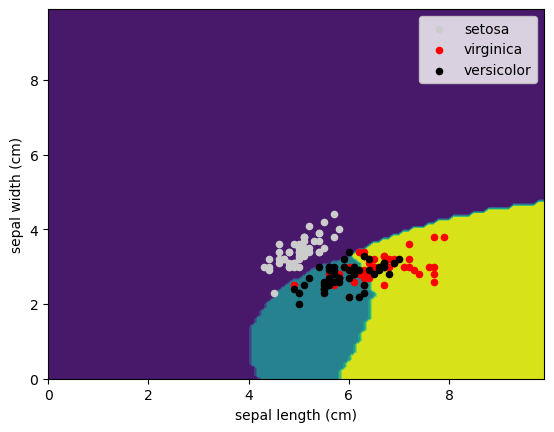

In [23]:
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                           ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                              ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                               ax=ax, label="versicolor", color="k")

Why should we use `PolynomialFeatures` before `StandardScaler`?

1. Data won't be centered if second step is `PolynomialFeatures`
2. Also, when you square after standardization, small and large numbers have same value.

In [24]:
a

array([1, 2, 8, 9])

In [25]:
scaled = (a - a.mean()) / a.std()   # like StandardScaler
scaled

array([-1.13137085, -0.84852814,  0.84852814,  1.13137085])

In [26]:
scaled ** 2   # like PolynomialFeatures

array([1.28, 0.72, 0.72, 1.28])

As opposed to that, if we do `PolynomialFeatures` first and then `StandardScalar` next, we will get what we want.

In [27]:
a

array([1, 2, 8, 9])

In [28]:
squared_a = a ** 2 # like PolynomialFeatures
squared_a

array([ 1,  4, 64, 81])

In [29]:
(squared_a - squared_a.mean()) / squared_a.std()   # like StandardScaler

array([-1.02735414, -0.94291407,  0.74588725,  1.22438096])

### Scoring and Metrics

- https://scikit-learn.org/0.15/modules/model_evaluation.html
- import statements:
```python
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score
```

In [30]:
# pattern: positive => True, negative => False
df = pd.DataFrame([
    [15, True],
    [-2, False],
    [99, True],
    [-10, False],
    [8, True],
    [5, True],
    [-1000, False],
    [-1, False],
], columns=["x", "y"])
train, test = df.iloc[:4], df.iloc[4:]

In [31]:
train

,x,y
0,15,True
1,-2,False
2,99,True
3,-10,False


In [32]:
test

,x,y
4,8,True
5,5,True
6,-1000,False
7,-1,False


In [33]:
model = LogisticRegression()
model.fit(train[["x"]], train["y"])
model.predict(test[["x"]])

array([ True, False, False, False])

In [34]:
# by default, this uses accuracy_score
model.score(test[["x"]], test["y"])   

0.75

#### `accuracy_score(y_true, y_pred)`

- same result as invoking `score` method
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [35]:
# simple example
accuracy_score(["A", "B"], ["A", "C"])

0.5

In [36]:
accuracy_score(test["y"], model.predict(test[["x"]]))

0.75

What are the range of values of `accuracy_score` for a classification model?
- `0 to 1` because it is a fraction of predicted labels / actual labels => remember you can either get it correct or wrong.
- Recall as opposed to classification, for regression range for R^2 score is `-infinity to 1` => that is because the model can introduce non-existent variance within the data while trying to fit it!

#### Confusion Matrices

#### `confusion_matrix(y_true, y_pred)`

- computes confusion matrix for classification:
    - row dimension represents actual value
    - column dimension represents predicted value
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

<div>
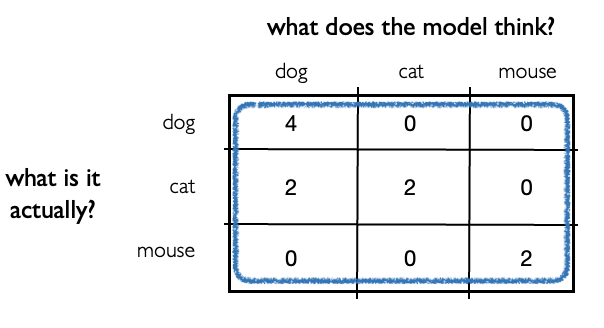
</div>

In [37]:
actual =    ["dog", "dog", "dog", "dog", "cat", "cat", "cat", "mouse", "mouse"]
predicted = ["dog", "dog", "dog", "cat", "cat", "dog", "cat", "mouse", "mouse"]

# notice that we have a "horse" label even though the data doesn't have any info about horse
labels = ["dog", "cat", "mouse", "horse"]

# ROW: an actual category
# COL: a prediction
cm = confusion_matrix(actual, predicted, labels=labels)
cm

array([[3, 1, 0, 0],
       [1, 2, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 0]])

In [38]:
pd.DataFrame(cm, index=labels, columns=labels)

,dog,cat,mouse,horse
dog,3,1,0,0
cat,1,2,0,0
mouse,0,0,2,0
horse,0,0,0,0


In [39]:
actual =    ["dog", "dog", "dog", "dog", "cat", "cat", "cat", "cat", "mouse", "mouse"] * 199
predicted = ["dog", "dog", "dog", "dog", "cat", "dog", "cat", "dog", "mouse", "mouse"] * 199
actual += ["horse"] * 10
predicted += ["dog"] * 9 + ["horse"]

labels = ["dog", "cat", "mouse", "horse"]
cm = confusion_matrix(actual, predicted, labels=labels)
cm = pd.DataFrame(cm, index=labels, columns=labels)
cm

,dog,cat,mouse,horse
dog,796,0,0,0
cat,398,398,0,0
mouse,0,0,398,0
horse,9,0,0,1


### Recall and balanced accuracy score

- import statement:
```python
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score
```

#### Recall: row-wise ratio

- What proportion of actual positives was identified correctly?

In [40]:
# what is the recall for cat?
cm.at["cat", "cat"] / cm.loc["cat", :].sum()

0.5

In [41]:
# There are multiple recall scores as we have multiple labels
# So, we need to pass argument to parameter "average"
recall_score(actual, predicted)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [42]:
recall_score(actual, predicted, average=None)

array([0.5, 1. , 0.1, 1. ])

In [43]:
# How can we identify which score is for which label?
print(labels)
# We can pass a list of labels argument to parameter "labels"
recall_score(actual, predicted, average=None, labels=labels)

['dog', 'cat', 'mouse', 'horse']


array([1. , 0.5, 1. , 0.1])

In [44]:
cm

,dog,cat,mouse,horse
dog,796,0,0,0
cat,398,398,0,0
mouse,0,0,398,0
horse,9,0,0,1


How does average recall score compare against accuracy score?

In [45]:
accuracy_score(actual, predicted)

0.7965

In [46]:
# will this be bigger or smaller than accuracy?
recall_score(actual, predicted, average=None, labels=labels).mean()

0.65

We are saying "horse" is equally important as other animals by taking an average of recall. So average recall score is lower than overall accuracy.

#### Average recall score is "Balanced accuracy score"

In [47]:
# average of recall scores is called balanced accuracy score
balanced_accuracy_score(actual, predicted)

0.65

Why does "Balanced accuracy score" matter?

- Imagine you are building a new covid test. We know majority of the times covid test is supposed to be negative.
- So, you might get a high accuracy even if your covid test is missing actual positives.
- If you just look at accuracy, that might be misleading. So, you must also look at "Balanced accuracy score".

### Precision: column-wise ratio

- What proportion of positive identifications was actually correct?

In [48]:
cm

,dog,cat,mouse,horse
dog,796,0,0,0
cat,398,398,0,0
mouse,0,0,398,0
horse,9,0,0,1


In [49]:
print(labels)
precision_score(actual, predicted, average=None, labels=labels)

['dog', 'cat', 'mouse', 'horse']


array([0.66167914, 1.        , 1.        , 1.        ])

### Binary Classification Metrics

Unless otherwise specified, "precision" and "recall" refer to those metrics for the positive class when we're doing binary classification.

<div>
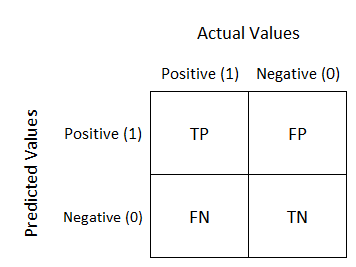
</div>

In [50]:
actual = [False, True, True, True, True, False, False, True, True, True, True, True, True]
predicted = [False, True, True, True, True, True, True, False, False, False, True, True, True]
confusion_matrix(actual, predicted)

array([[1, 2],
       [3, 7]])

In [51]:
recall_score(actual, predicted, average=None, labels=[True, False])

array([0.7       , 0.33333333])

In [52]:
# for binary classification, we have False recall and True recall
# "recall" is shorthand for "True recall"
recall_score(actual, predicted)

0.7

In [53]:
precision_score(actual, predicted, average=None, labels=[True, False])

array([0.77777778, 0.25      ])

In [54]:
# for binary classification, we have False precision and True precision
# "precision" is shorthand for "True precision"
precision_score(actual, predicted)

0.7777777777777778

# Unsupervised Learning: Clustering

- In classification (supervised), we try to find boundaries/rules to separate points according to pre-determined labels.
- In clustering, the algorithm chooses the labels.  Goal is to choose labels so that similar rows get labeled the same.

Today: K-Means Clustering

- import statement:
```python
from sklearn.cluster import KMeans
```

In [55]:
# Generate random data

x, y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=3)
df = pd.DataFrame(x, columns=["x0", "x1"])
df.head()

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995


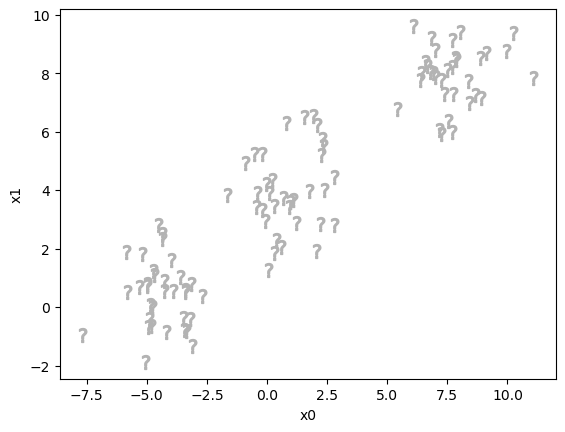

In [56]:
def km_scatter(df, **kwargs):
    """
    Produces scatter plot visualizations with x0 on x-axis and y0 on y-axis.
    It can also plot the centroids for clusters.
    Parameters:
        x0 => x-axis
        x1 => y-axis
        cluster => marker type
    """
    ax = kwargs.pop("ax", None)
    if not "label" in df.columns:
        return df.plot.scatter(x="x0", y="x1", marker="$?$", ax=ax, **kwargs)

    for marker in set(df["label"]):
        sub_df = df[df["label"] == marker]
        ax = sub_df.plot.scatter(x="x0", y="x1", marker=marker, ax=ax, **kwargs)
    return ax

ax = km_scatter(df, s=100, c="0.7")

### Hard Problem

Finding the best answer.

### Easier Problem

Taking a random answer and make it a little better. Then repeat!

<AxesSubplot:xlabel='x0', ylabel='x1'>

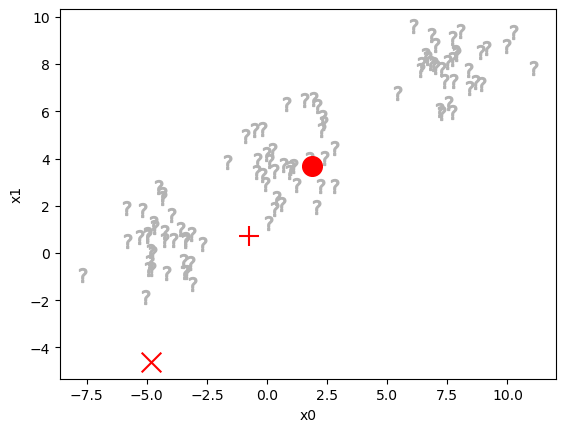

In [57]:
clusters = np.random.uniform(-5, 5, size=(3, 2))
clusters = pd.DataFrame(clusters, columns=["x0", "x1"])
clusters["label"] = ["o", "+", "x"]

ax = km_scatter(df, s=100, c="0.7")
km_scatter(clusters, s=200, c="red", ax=ax)

In [58]:
clusters

,x0,x1,label
0,1.889234,3.692821,o
1,-0.752572,0.707222,+
2,-4.831864,-4.616862,x


In [59]:
df.head()

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995


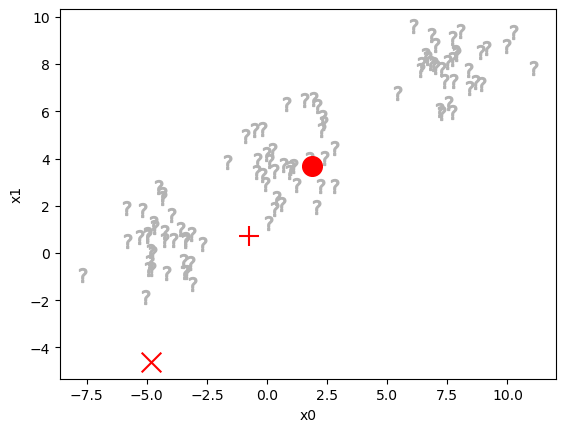

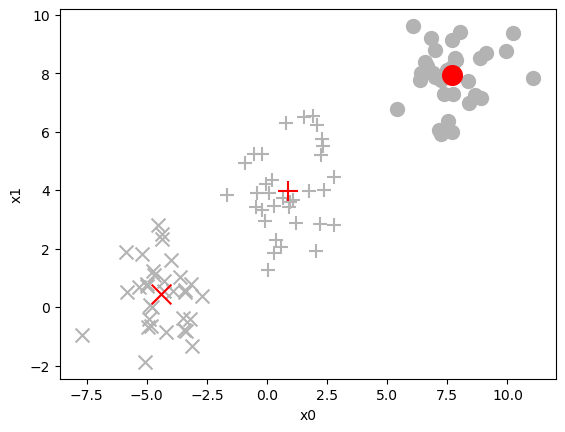

In [60]:
class KM:
    def __init__(self, df, clusters):
        # We make copies because we are going to keep changing the dataframe to 
        # identify better clusters
        self.df = df.copy()
        self.clusters = clusters.copy()
        self.labels = clusters["label"].values
        
    def plot(self):
        ax = km_scatter(self.df, color="0.7", s=100)
        km_scatter(self.clusters, ax=ax, color="red", s=200)
        
    def assign_points(self):
        """
        compute Euclidean distance between each point and each centroids
        """
        for center in self.clusters.itertuples():
            x0_diff = df["x0"] - center.x0
            x1_diff = df["x1"] - center.x1
            distances = (x0_diff ** 2 + x1_diff ** 2) ** 0.5
            # add distance to each centroid as a column within the dataframe
            self.df[center.label] = distances
        # get the label of the nearest centroid
        self.df["label"] = self.labels[self.df[self.labels].values.argmin(axis=1)]
    
    def update_centers(self):
        """
        update centroids by taking mean of the points that are nearest to that
        particular centroid
        """
        for center in self.clusters.itertuples():
            subset_df = self.df[self.df["label"] == center.label]
            if len(subset_df) > 0:
                x0 = subset_df["x0"].mean()
                x1 = subset_df["x1"].mean()
                self.clusters.at[center.Index, "x0"] = x0
                self.clusters.at[center.Index, "x1"] = x1

km = KM(df, clusters)
km.plot()

for i in range(10):
    km.assign_points()
    km.update_centers()
    
km.plot()

### `sklearn KMeans`

1. fit: find good centroids
2. transform: give me the distances from each point to each centroid
3. predict: give me the chosen group labels